In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_context("paper")

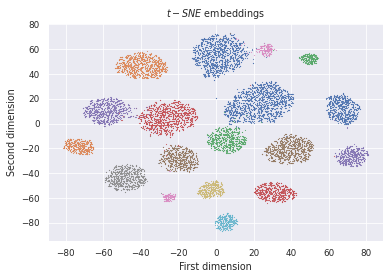

Analyzed session 0


In [2]:
data_dir = "/export/gaon1/data/jteneggi/DL"
pedreira_dir = os.path.join(data_dir, "pedreira")
gt_dir = os.path.join(pedreira_dir, "ground_truth")

spike_classes = np.load(os.path.join(gt_dir, "spike_classes.npy"), allow_pickle=True).squeeze()

n_sess = 95
for sess in range(n_sess):
    sess_dir = os.path.join(pedreira_dir, f"session_{sess}")
    channel_dir = os.path.join(sess_dir, "channel_0")
    spikes = np.load(os.path.join(channel_dir, "spikes.npy"), allow_pickle=True)
    spike_times = np.load(os.path.join(channel_dir, "spike_times.npy"), allow_pickle=True)
    gt_classes = spike_classes[sess].squeeze()
    assert len(spikes) == len(gt_classes)
    pca = PCA(n_components=9)
    tsne = TSNE(n_components=2)
    reduced_data = pca.fit_transform(spikes)
    manifold = tsne.fit_transform(reduced_data)
    
    x = manifold[:, 0]
    y = manifold[:, 1]

    for c in range(20):
        plt.scatter(x[gt_classes == c], y[gt_classes == c], marker=".", s=.5)
    plt.xlabel(r"First dimension")
    plt.ylabel(r"Second dimension")
    plt.title(r"$t-SNE$ embeddings")
    plt.savefig(os.path.join("figures", f"{sess}.png"))
    plt.show()
    plt.close()
    print(f"Analyzed session {sess}")